In [3]:
import numpy as np
import matplotlib.pyplot as plt
from cytokit import io as cytokit_io
from cytokit import config as cytokit_config

In [10]:
path = '/lab/data/dna-stain/20180808-jurkat-pha-dapi-r1/output/v00/extract/best_z_segm/R001_X003_Y003.tif'
img, meta = cytokit_io.read_tile(path, return_metadata=True)
img.shape, img.dtype

((1, 1, 4, 1008, 1344), dtype('uint16'))

In [11]:
img = img[0, 0]
img.shape

(4, 1008, 1344)

In [12]:
meta['labels']

['cyto_cell_boundary', 'cyto_nucleus_boundary', 'proc_DAPI', 'proc_PHA']

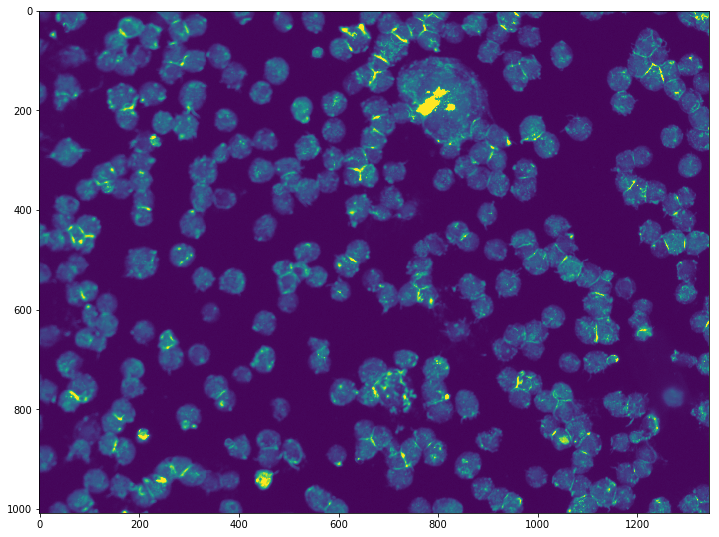

In [29]:
plt.imshow(img[3])
plt.gcf().set_size_inches(12, 12)

In [36]:
from skimage import morphology 
img_nuc = img[1]
img_nuc = img_nuc > 0
img_nuc = morphology.remove_small_holes(img_nuc, area_threshold=10000)

In [66]:
# plt.imshow(img_nuc)
# plt.gcf().set_size_inches(12, 12)

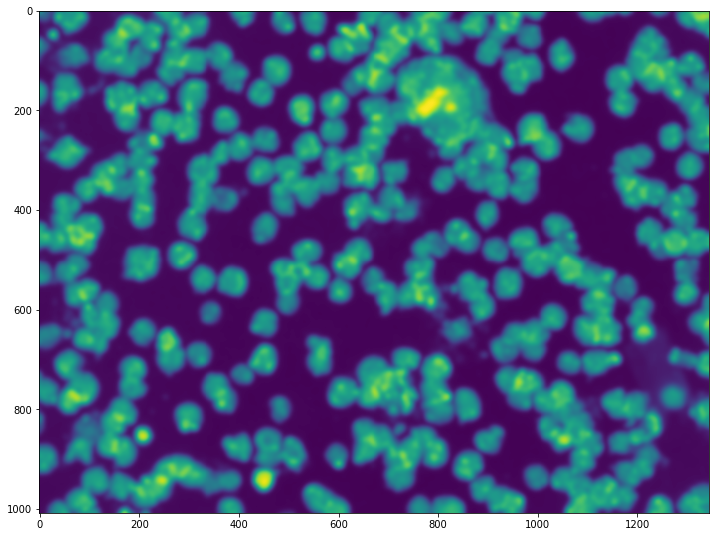

In [221]:
from skimage import filters
from skimage import exposure
img_seg_orig = img[3]
img_seg = img_seg_orig.copy()
img_seg = filters.gaussian(img_seg, 5)
# img_seg = filters.median(img_seg, selem=morphology.disk(5))
img_seg = exposure.adjust_gamma(img_seg, gamma=.1)

plt.imshow(img_seg)
plt.gcf().set_size_inches(12, 12)

In [212]:
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)
from skimage.segmentation import find_boundaries
from skimage.filters import threshold_otsu

In [174]:
# init_ls = checkerboard_level_set(img_seg.shape, 6)
#init_ls = circle_level_set(img_seg.shape)
init_ls = img_nuc.astype(np.uint8)

In [175]:
np.unique(init_ls.ravel())

array([0, 1], dtype=uint8)

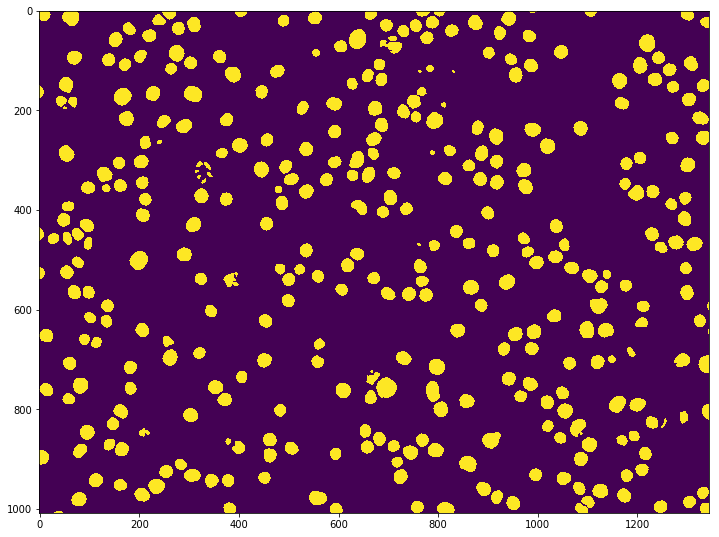

In [176]:
plt.imshow(init_ls)
plt.gcf().set_size_inches(12, 12)

In [222]:
#ls = morphological_chan_vese(img_seg, 8, init_level_set=init_ls, smoothing=3)
ls = img_seg > threshold_otsu(img_seg)

In [223]:
#plt.imshow(exposure.rescale_intensity(img_seg_orig.astype('float'), in_range='image', out_range=(0, 1)))
#plt.imshow((img_seg_orig - img_seg_orig.min()) / (img_seg_orig.max() - img_seg_orig.min()))

In [235]:
img_seg_orig.max()

255

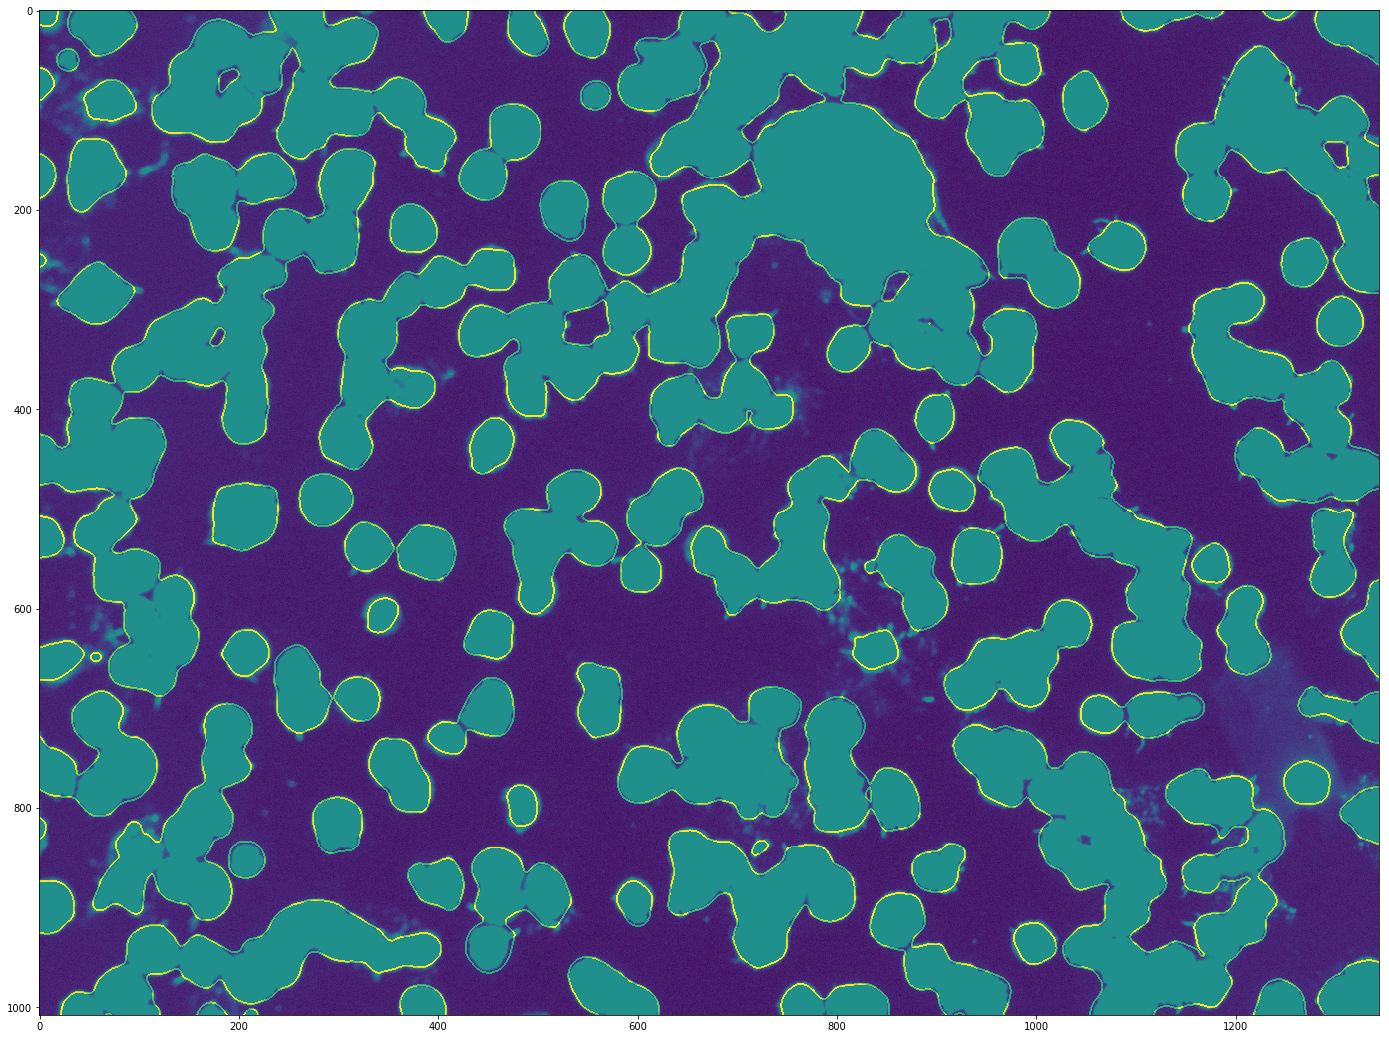

In [241]:
from skimage import exposure
img1 = exposure.rescale_intensity(img_seg_orig.astype(float).clip(0, 30), in_range='image', out_range='float')
img_viz = .5 * img1 + .5 * find_boundaries(ls).astype(np.uint8)
plt.imshow(img_viz, cmap='viridis')
plt.gcf().set_size_inches(24, 24)